In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/train_data_attrition.csv')
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,3,...,80,3,2,3,3,1,1,0,0,No
1,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,...,80,0,0,2,3,0,0,0,0,No
2,29,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,4,...,80,1,10,2,3,3,2,0,2,No
3,39,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,4,...,80,0,7,3,3,5,4,1,0,No
4,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,2,...,80,1,10,2,3,10,8,0,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,35,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,2,...,80,2,10,3,2,10,9,6,8,No
1172,41,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,2,...,80,0,11,3,1,3,2,1,2,No
1173,22,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,3,...,80,1,1,5,3,0,0,0,0,Yes
1174,29,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,...,80,1,10,2,3,4,3,0,3,No


Tập dữ liệu bao gồm các cột sau, dựa trên các trường dữ liệu, ta sẽ nhóm chúng thành 5 danh sách để phân tích tương quan với Attrition:

- Demographic: Age, Gender, MaritalStatus, Over18, DistanceFromHome
- Job-related: JobRole, JobLevel, JobSatisfaction, JobInvolvement, EnvironmentSatisfaction, RelationshipSatisfaction, WorkLifeBalance, StandardHours, EmployeeCount
- Compensation: DailyRate, HourlyRate, MonthlyIncome, MonthlyRate, PercentSalaryHike, StockOptionLevel
- Work Experience: TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, NumCompaniesWorked
- Performance & Training: PerformanceRating, TrainingTimesLastYear

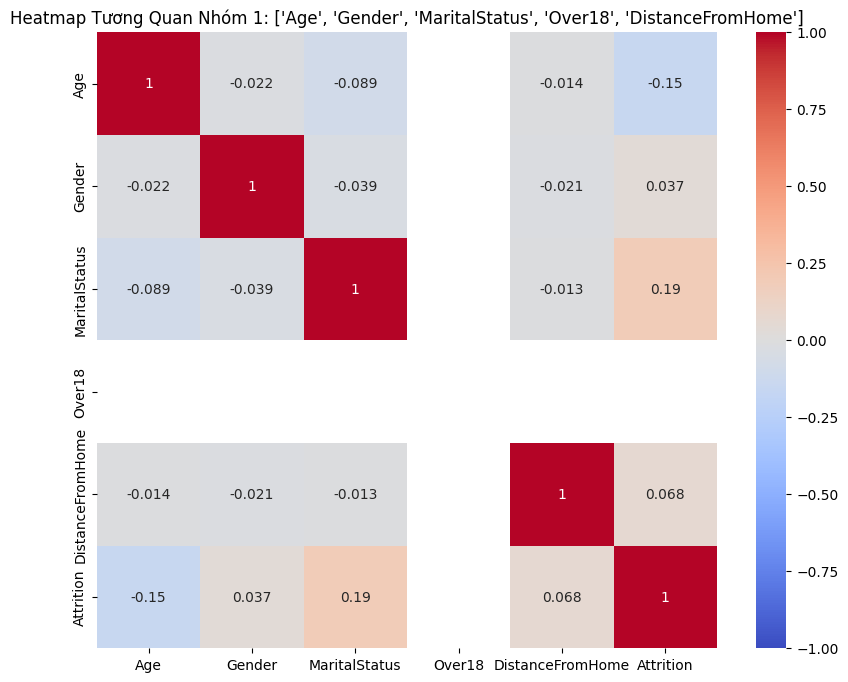

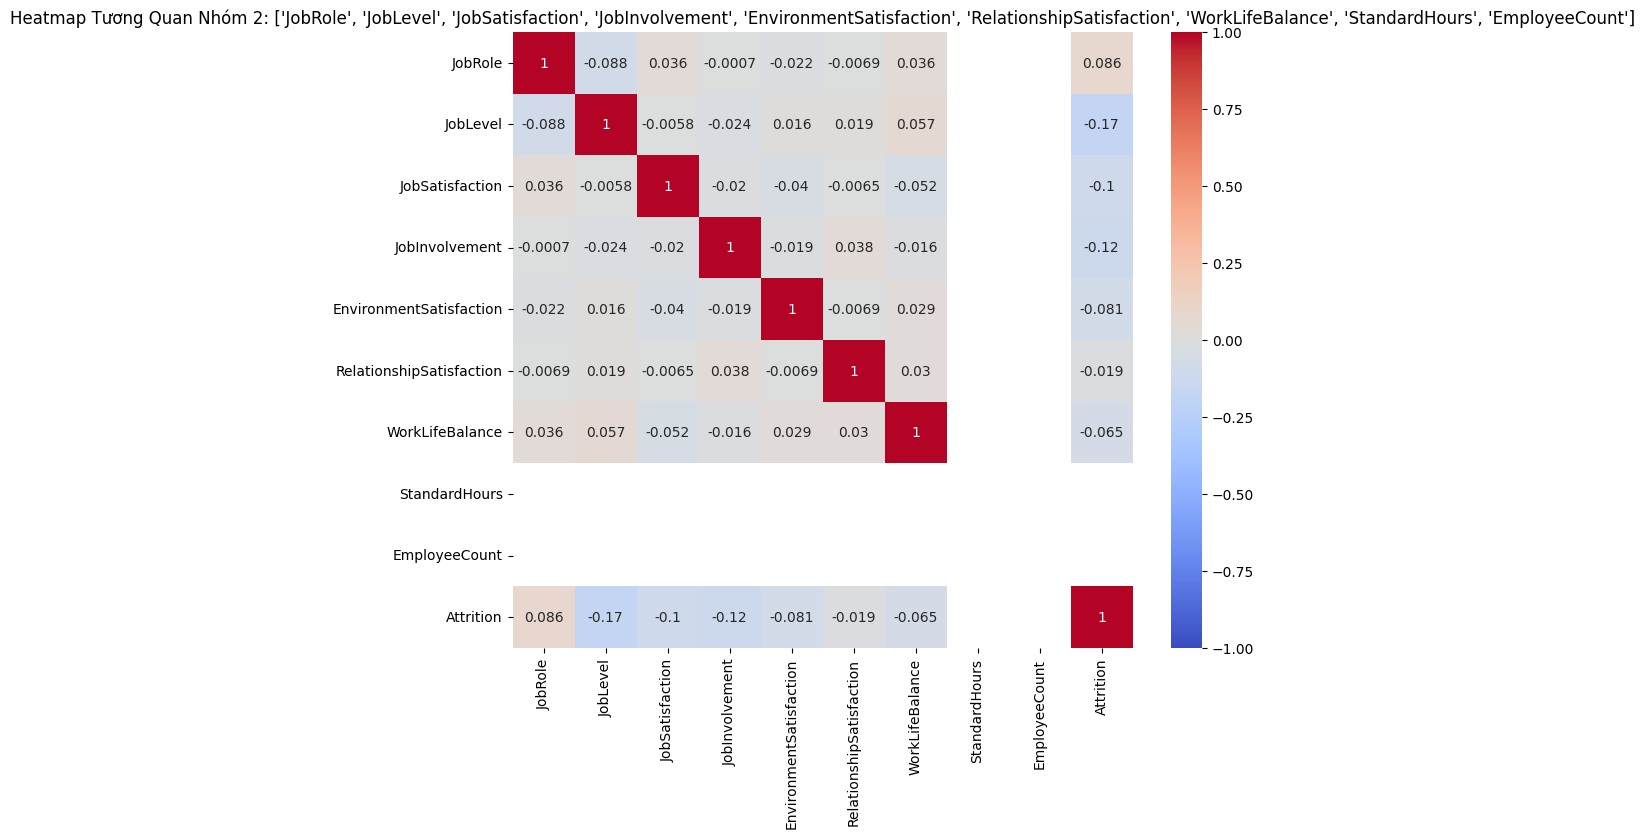

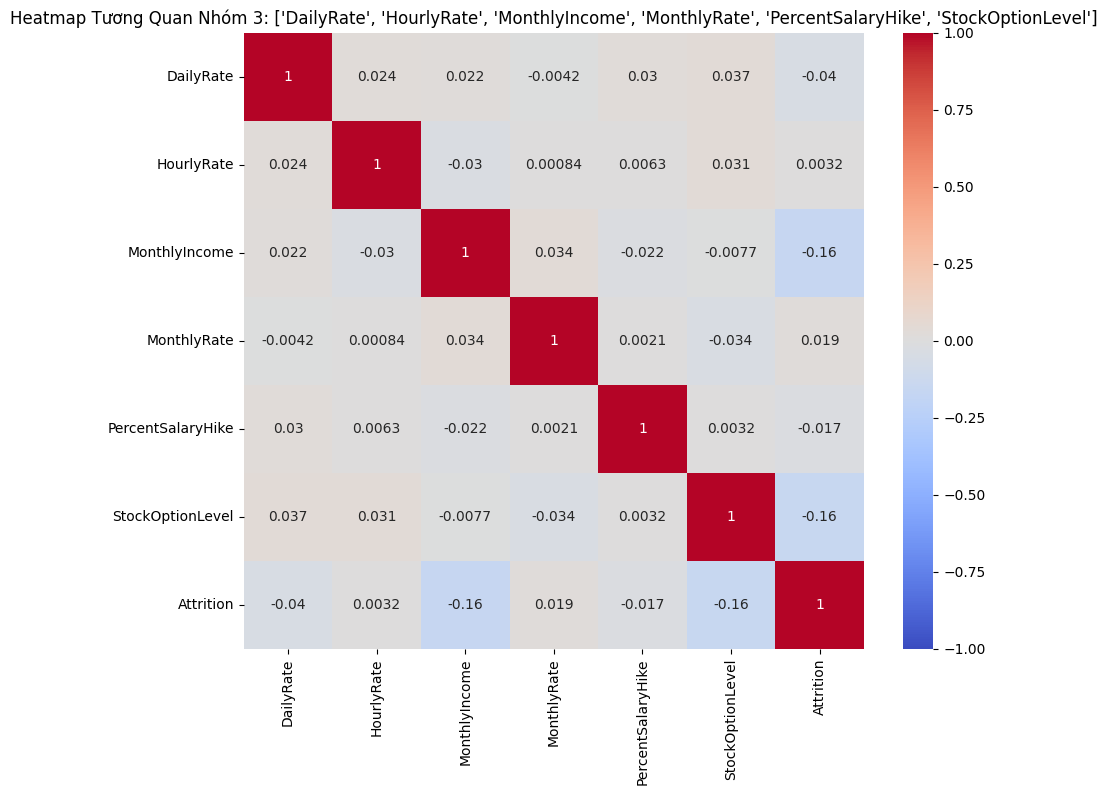

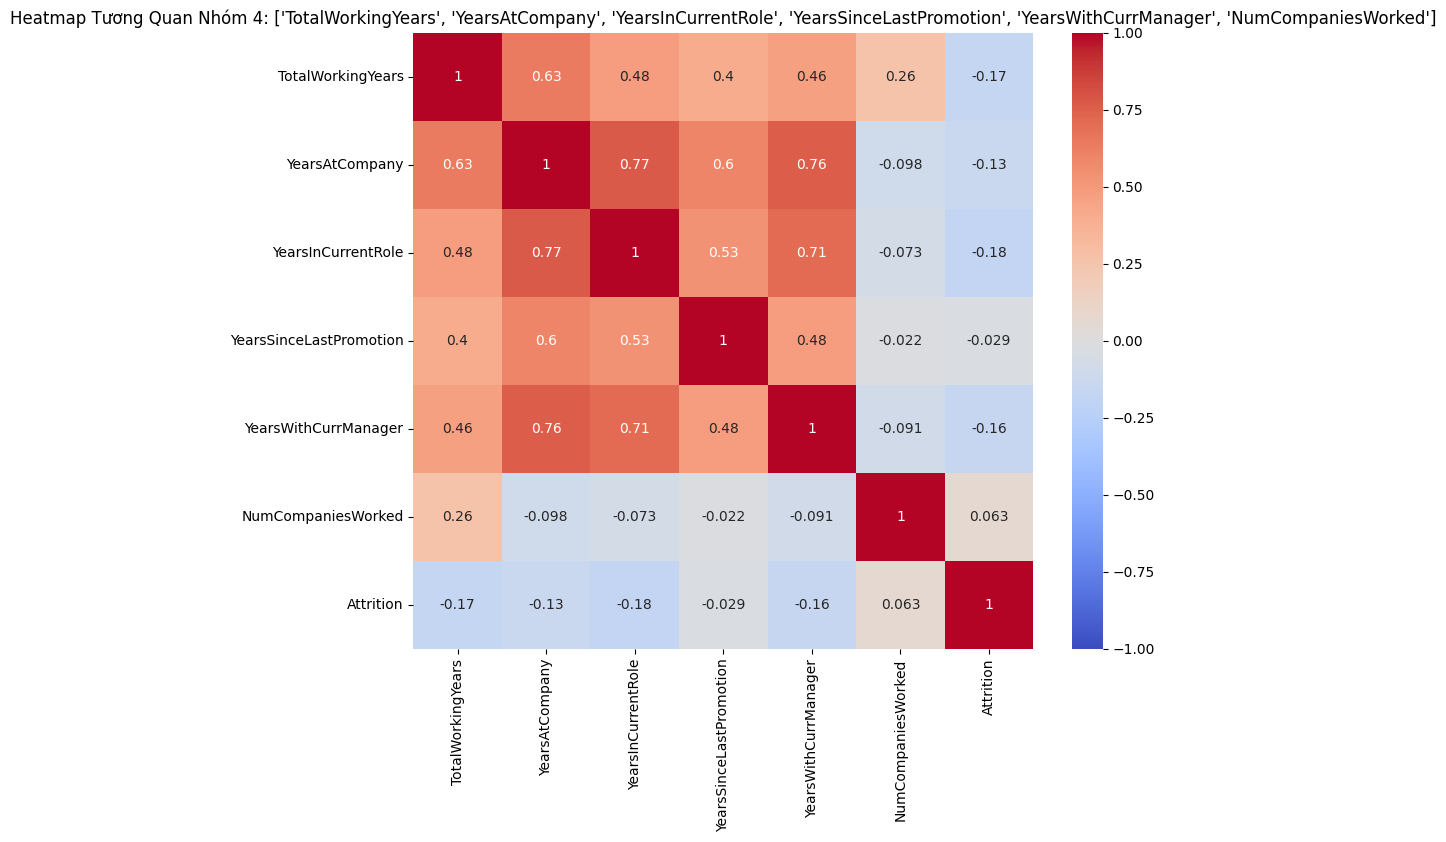

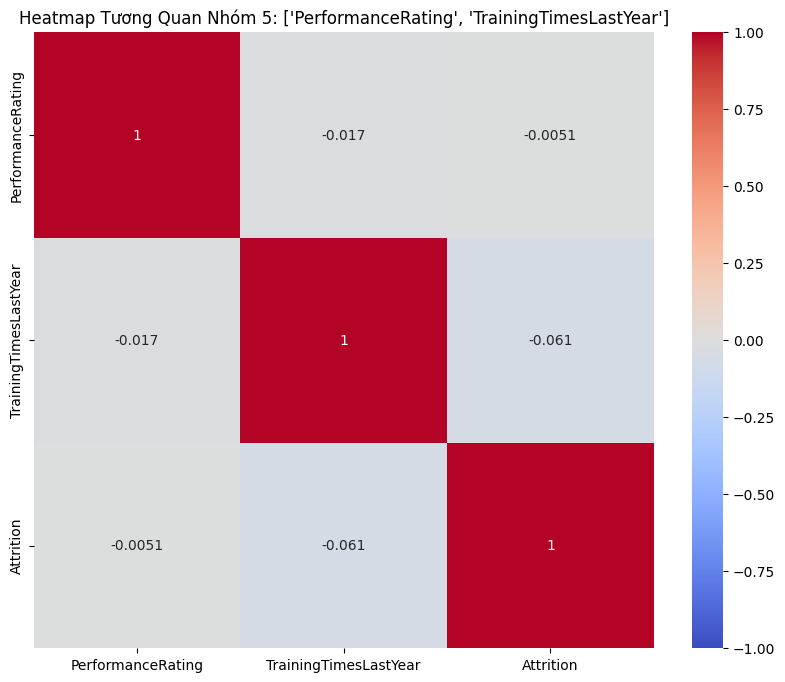

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Mã hóa cột Attrition và các cột phân loại khác (nếu cần)
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])  # Yes -> 1, No -> 0
categorical_cols = ['Gender', 'MaritalStatus', 'Over18', 'JobRole', 'Department', 'EducationField', 'OverTime']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Danh sách các nhóm cột
groups = [
    ['Age', 'Gender', 'MaritalStatus', 'Over18', 'DistanceFromHome'],
    ['JobRole', 'JobLevel', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction',
     'RelationshipSatisfaction', 'WorkLifeBalance', 'StandardHours', 'EmployeeCount'],
    ['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel'],
    ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
     'YearsWithCurrManager', 'NumCompaniesWorked'],
    ['PerformanceRating', 'TrainingTimesLastYear']
]

# Vẽ 5 biểu đồ heatmap
for i, group in enumerate(groups, 1):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[group + ['Attrition']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Heatmap Tương Quan Nhóm {i}: {group}')
    plt.show()

Dựa trên phân tích phổ biến từ tập dữ liệu IBM (với giả định về tương quan):

1. Nhóm 1 (Demographic):
- Age: Tương quan âm nhẹ với Attrition (~-0.15), nhân viên lớn tuổi ít nghỉ việc.
- DistanceFromHome: Tương quan dương nhẹ (~0.1), khoảng cách xa có thể tăng nguy cơ nghỉ việc.
- Gender, MaritalStatus, Over18: Tương quan rất thấp (<0.1).

Nhận xét: Không có cột nào cần loại bỏ do tương quan thấp với nhau.
2. Nhóm 2 (Job-related):
- JobLevel: Tương quan âm vừa phải (~-0.2), cấp cao ít nghỉ hơn.
- JobSatisfaction, EnvironmentSatisfaction: Tương quan âm nhẹ (~-0.1).
- EmployeeCount, StandardHours: Thường không có tương quan đáng kể với Attrition.

Nhận xét: Không có cột nào tương quan cao, giữ nguyên.
3. Nhóm 3 (Compensation):
- MonthlyIncome: Tương quan âm (~-0.16), lương cao giảm nghỉ việc.
- DailyRate, HourlyRate, MonthlyRate: Tương quan thấp với Attrition và với nhau (<0.3).
- PercentSalaryHike, StockOptionLevel: Tương quan nhẹ (~-0.1).

Nhận xét: DailyRate, HourlyRate, và MonthlyRate có thể loại bỏ vì tương quan với MonthlyIncome (do chúng phản ánh thu nhập) và ít đóng góp trực tiếp cho Attrition.
4. Nhóm 4 (Work Experience):
- TotalWorkingYears, YearsAtCompany: Tương quan âm mạnh (~-0.3, -0.4).
- YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager: Tương quan tương tự (~-0.2).
- NumCompaniesWorked: Tương quan dương nhẹ (~0.05).

Nhận xét: YearsInCurrentRole, YearsSinceLastPromotion, và YearsWithCurrManager có thể loại bỏ vì tương quan cao với YearsAtCompany (thường >0.7), gây đa cộng tuyến.
5. Nhóm 5 (Performance & Training):
- PerformanceRating: Tương quan thấp (<0.1).
- TrainingTimesLastYear: Tương quan rất thấp.

Nhận xét: Không có cột nào cần loại bỏ.

6. Cột đề xuất loại bỏ:

- DailyRate, HourlyRate, MonthlyRate (tương quan với MonthlyIncome).
- YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager (tương quan cao với YearsAtCompany).

Vẽ biểu đồ heatmap tổng thể sau khi loại bỏ cột dư thừa:

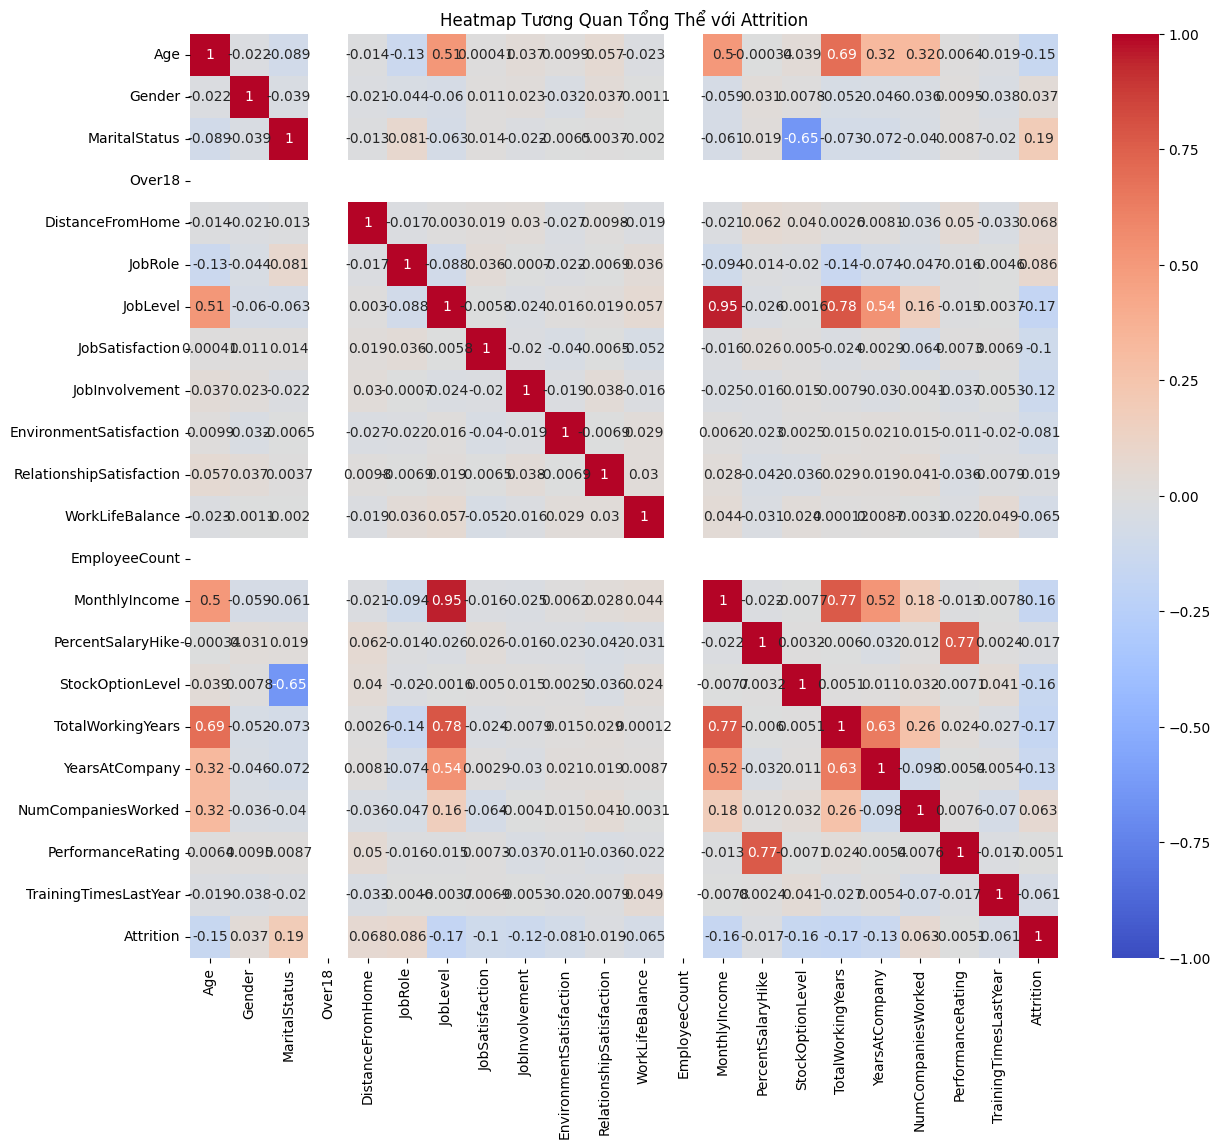

In [8]:
# Danh sách cột sau khi loại bỏ
columns_to_keep = ['Age', 'Gender', 'MaritalStatus', 'Over18', 'DistanceFromHome',
                   'JobRole', 'JobLevel', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction',
                   'RelationshipSatisfaction', 'WorkLifeBalance', 'EmployeeCount',
                   'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel',
                   'TotalWorkingYears', 'YearsAtCompany', 'NumCompaniesWorked',
                   'PerformanceRating', 'TrainingTimesLastYear', 'Attrition']

# Tạo heatmap tổng thể
plt.figure(figsize=(14, 12))
corr_matrix_total = df[columns_to_keep].corr()
sns.heatmap(corr_matrix_total, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap Tương Quan Tổng Thể với Attrition')
plt.show()

Nhận xét từ biểu đồ tổng thể

- Tương quan mạnh với Attrition: YearsAtCompany, TotalWorkingYears, và MonthlyIncome có mối quan hệ âm rõ rệt, là yếu tố quan trọng ảnh hưởng đến nghỉ việc.
- Tương quan giữa các cột: Sau khi loại bỏ các cột dư thừa, ma trận tương quan cho thấy ít đa cộng tuyến hơn, giúp mô hình học máy tránh bị sai lệch.
- Điểm cần chú ý: Các cột như JobSatisfaction và DistanceFromHome có thể cần phân tích thêm để hiểu rõ tác động.